In [201]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [169]:
data = pd.read_csv("News_score(2).csv")

In [170]:
data.head()

,Unnamed: 0,Date,High,Low,Open,Close,Volume,Adj Close,Daily Growth,LabeledY1,LabeledY2,title_score1,abs_score1,title_score2,abs_score2,title_polarity,title_subjectivity,abs_polarity,abs_subjectivity
0,0,2016-09-26,2158.540039,2145.040039,2158.540039,2146.100098,3216170000,2146.100098,-0.005763,-1,-1,0.9508,0.9990,0.3612,0.9952,0.070004,0.396425,0.041043,0.413740
1,1,2016-09-27,2161.129883,2141.550049,2146.040039,2159.929932,3437770000,2159.929932,0.006472,1,1,0.9881,0.9976,-0.9761,-0.9717,0.010467,0.412125,0.017999,0.435100
2,2,2016-09-28,2172.399902,2151.790039,2161.850098,2171.370117,3891460000,2171.370117,0.004404,0,1,-0.9888,0.9942,-0.9806,0.7184,0.061586,0.368534,0.050819,0.481116
3,3,2016-09-29,2172.669922,2145.199951,2168.899902,2151.129883,4249220000,2151.129883,-0.008193,-1,-1,0.9911,0.9987,0.6249,0.9856,0.009768,0.415676,0.025399,0.419600
4,4,2016-09-30,2175.300049,2156.510010,2156.510010,2168.270020,4173340000,2168.270020,0.005453,0,1,-0.8984,0.9958,-0.9623,0.9417,0.081814,0.429716,0.054197,0.412035


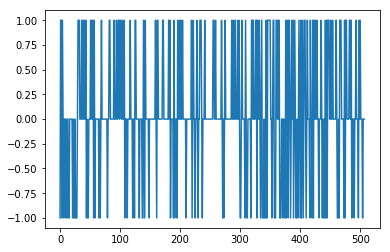

In [214]:
data['LabeledY2'].plot()

In [215]:
y=data['LabeledY2'].ravel()

In [216]:
data['title_score1'].describe()
x=data[['title_score1']]

SVC

In [232]:

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, y_train.shape
((409,), (409,))
x_test.shape, y_test.shape
((108,), (108,))

clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)

clf.score(x_train, y_train)

0.5886699507389163

In [233]:
clf.score(x_test, y_test)

0.5196078431372549

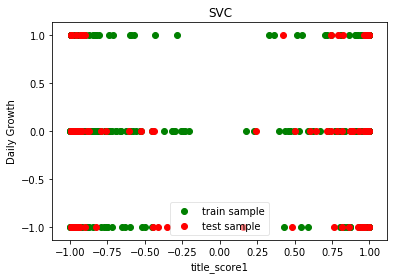

In [237]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# X = np.arange(-1.0, 1.0, 0.01)[:, np.newaxis]
# y = tree.predict(x_test)
ax.scatter(x_train,y_train,label="train sample",c='g')
ax.scatter(x_test,y_test,label="test sample",c='r')
# ax.scatter(x_test,y,label="predict value", marker='x')
ax.set_xlabel("title_score1")
ax.set_ylabel("Daily Growth")
ax.set_title("SVC")
ax.legend(framealpha=0.5)
plt.show()

Data Transformation

In [220]:
# add data transformation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train.shape, y_train.shape
((409,), (409,))
x_test.shape, y_test.shape
((108,), (108,))

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_transformed = scaler.transform(x_train)
clf = svm.SVR(C=1).fit(x_train_transformed, y_train)
clf.score(x_train_transformed, y_train)

0.003428734513568621

In [221]:
x_test_transformed = scaler.transform(x_test)
clf.score(x_test_transformed, y_test) 
# we have the same performance, data scaling doesn't improve the scores of test here.

0.0008881528929551852

Cross-validation

In [207]:
# Cross-validation
# another splitting method, since our sampling with only 508 samples is small.

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, x, y, cv=10)
scores # performance of 10 tests

array([0.57692308, 0.57692308, 0.56862745, 0.56862745, 0.56862745,
       0.56862745, 0.58      , 0.58      , 0.58      , 0.58      ])

In [208]:
scores.mean() #the average of 10 scores is higher than before

0.5748355957767722

SVR

In [281]:
y=data['LabeledY2'].ravel()
x=data[['abs_score2']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [283]:
svr_rbf = SVR(C=1.0, kernel='rbf',) # defining the support vector regression models
svr_lin = SVR(kernel= 'linear')
svr_poly = SVR(kernel= 'poly')

clf_rbf=svr_rbf.fit(x_train, y_train) # fitting the data points in the models
clf_lin=svr_lin.fit(x_train, y_train)
clf_poly=svr_poly.fit(x_train, y_train)

clf_rbf.score(x_test, y_test)#the best fit of 3 methods, but is still not fitting to the dataset.


/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.02169259065037421

/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


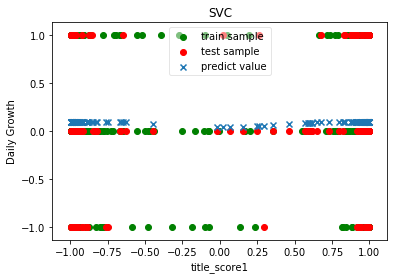

In [291]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

y = svr_rbf.predict(x_test)
ax.scatter(x_train,y_train,label="train sample",c='g')
ax.scatter(x_test,y_test,label="test sample",c='r')
ax.scatter(x_test,y,label="predict value", marker='x')
ax.set_xlabel("title_score1")
ax.set_ylabel("Daily Growth")
ax.set_title("SVC")
ax.legend(framealpha=0.5,loc='lower')

plt.show()

In [257]:
clf_lin.score(x_test, y_test)

-0.02124975920417893

In [251]:
clf_poly.score(x_test, y_test)

-0.02124994650298384

Using another sentiment analysis resulat as input of X

Only consider "title"

In [268]:
#try to use another second sentiment analysis result as X to fit the model
#only considering "title"
x1=data['title_polarity']
x2 = data['title_subjectivity']
x=[[x1[i],x2[i]]for i in range(len(x1))] 

In [284]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
svr_rbf = SVR(kernel= 'rbf') # defining the support vector regression models
svr_lin = SVR(kernel= 'linear')
svr_poly = SVR(kernel= 'poly')

clf_rbf=svr_rbf.fit(x_train, y_train) # fitting the data points in the models
clf_lin=svr_lin.fit(x_train, y_train)
clf_poly=svr_poly.fit(x_train, y_train)

clf_rbf.score(x_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.02169259065037421

In [285]:
clf_lin.score(x_test, y_test)

-0.02124975920417893

Only consider "abstract"

In [271]:
# when we only consider abstract:
x1 = data['abs_polarity']
x2 = data['abs_subjectivity']
x=[[x1[i],x2[i]]for i in range(len(x1))] 

In [272]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [273]:
svr_rbf = SVR(kernel= 'rbf') # defining the support vector regression models
svr_lin = SVR(kernel= 'linear')
svr_poly = SVR(kernel= 'poly')

clf_rbf=svr_rbf.fit(x_train, y_train) # fitting the data points in the models
clf_lin=svr_lin.fit(x_train, y_train)
clf_poly=svr_poly.fit(x_train, y_train)

clf_rbf.score(x_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.021200884942954135

Both "title" and "abstract" are considered

In [275]:
# when we consider both  abstract and  title as vector x:
x1=data['title_polarity']
x2 = data['title_subjectivity']
x3 = data['abs_polarity']
x4 = data['abs_subjectivity']
x=[[x1[i],x2[i],x3[i],x4[i]]for i in range(len(x1))] 

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [277]:
svr_rbf = SVR(kernel= 'rbf') # defining the support vector regression models
svr_lin = SVR(kernel= 'linear')
svr_poly = SVR(kernel= 'poly')

clf_rbf=svr_rbf.fit(x_train, y_train) # fitting the data points in the models
clf_lin=svr_lin.fit(x_train, y_train)
clf_poly=svr_poly.fit(x_train, y_train)

clf_rbf.score(x_test, y_test)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-0.021282201249407384

/usr/local/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


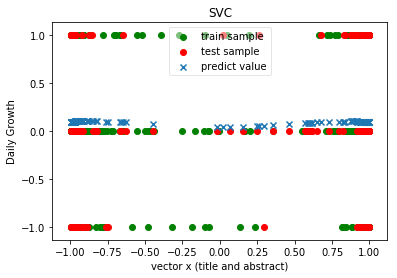

In [293]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

y = svr_rbf.predict(x_test)
ax.scatter(x_train,y_train,label="train sample",c='g')
ax.scatter(x_test,y_test,label="test sample",c='r')
ax.scatter(x_test,y,label="predict value", marker='x')
ax.set_xlabel("vector x (title and abstract)")
ax.set_ylabel("Daily Growth")
ax.set_title("SVC")
ax.legend(framealpha=0.5,loc='lower')

plt.show()